In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("breast_cancer.csv")

In [5]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data = data.drop(columns=['id','Unnamed: 32'])

In [8]:
X = data.drop(columns=['diagnosis'])

In [9]:
y = data['diagnosis']

In [10]:
y.head(5)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [13]:
y_new = pd.get_dummies(y)

In [15]:
y = y_new['B']

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: B, Length: 569, dtype: uint8

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [18]:
X_train.shape

(398, 30)

In [19]:
X_test.shape

(171, 30)

In [20]:
k_neighbors = range(1,50)

In [27]:
accuracy_train = []
accuracy_test = []
for k in k_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(model.predict(X_train),y_train))
    accuracy_test.append(accuracy_score(model.predict(X_test),y_test))

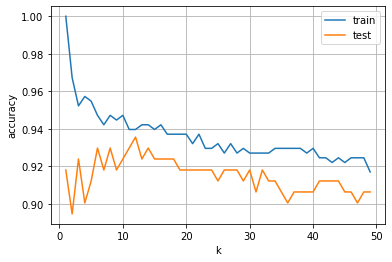

In [29]:
plt.plot(k_neighbors, accuracy_train)
plt.plot(k_neighbors, accuracy_test)
plt.legend(['train','test'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid('on')

In [33]:
kf = KFold(n_splits=5)

In [34]:
accuracy = []
for k in k_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    array = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    accuracy.append(array.mean())    

#     model.fit(X_train, y_train)
#     accuracy_train.append(accuracy_score(model.predict(X_train),y_train))
#     accuracy_test.append(accuracy_score(model.predict(X_test),y_test))

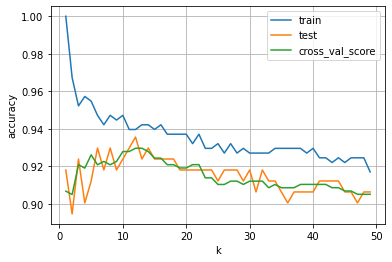

In [36]:
plt.plot(k_neighbors, accuracy_train)
plt.plot(k_neighbors, accuracy_test)
plt.plot(k_neighbors, accuracy)
plt.legend(['train','test', 'cross_val_score'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid('on')

In [39]:
c_range = np.arange(0.01,1,0.01)

In [42]:
accuracy = []
for c in c_range:
    model = LogisticRegression(C=c)
    array = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    accuracy.append(array.mean())    

C:\Users\NTI3\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\NTI3\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

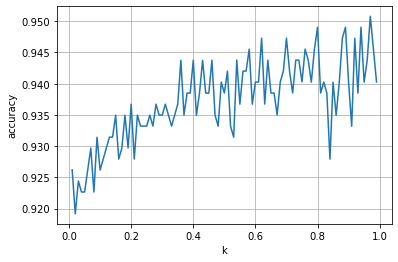

In [43]:
plt.plot(c_range, accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid('on')

In [45]:
scaler = StandardScaler()

In [46]:
X = scaler.fit_transform(X)

In [47]:
scaler.scale_

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [48]:
scaler.mean_

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])